# Time Evolution of a Particle in an Infinite Square Well

Project Source: https://deepnote.com/@mark-hannum/Particle-in-a-Box-UVY64-74QemxmMqmSJAgsQ

In [ ]:
# Import the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.constants as con
import cmath as cm 
# This makes the plots appear inside the notebook
%matplotlib inline

#the next line makes graphs look better on HD monitors, you can delete it if you want
%config InlineBackend.figure_format='retina'     

#this is the library function we are going to use to numericaly integrate wavefunctions
import scipy.integrate as it

In [ ]:
# declare global constants
L=1                                #set width of box
numpoints=100                      #pick the number of points we will evaluate things at inside box
x=np.linspace(0,L,numpoints)

hbar=1                             #to avoid some numerical issues (i.e. very small numbers)
m_e=1

wave = np.sqrt(735/L)* (np.power(x/L, 3) - (11/7)*np.power(x/L, 2) + (4/7)*(x/L)) # wave function at t=0
eigenfunc = lambda n : np.sqrt(2/L)*np.sin(n*np.pi*x/L) # eigenfunctions of the hamiltonian
eigenval = lambda n : np.power(hbar*np.pi*n/L, 2)/(2*m_e)

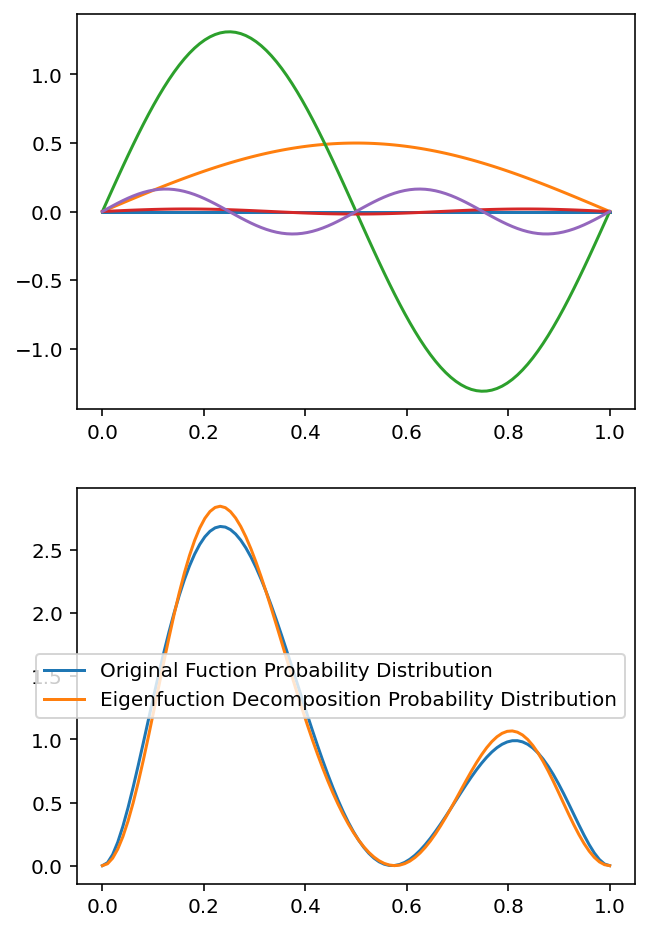

In [ ]:
def get_weights(precision):
    c = []
    for n in range(precision):
        c.append(it.simps(wave*eigenfunc(n), x))
    return c

def get_prob(amplitudes): # converts amplitudes to probabilities
    return np.power(np.absolute(amplitudes), 2)

def produce_eigen_plot(precision=5):
    c = get_weights(precision)
    fig, (ax1, ax2) = plt.subplots(2, figsize=(5, 8))
    eigen_approx = np.zeros(x.shape)
    for n in range(len(c)):
        ax1.plot(x, c[n]*eigenfunc(n))
        eigen_approx += c[n]*eigenfunc(n)

    line, = ax2.plot(x, get_prob(wave))
    line.set_label("Original Fuction Probability Distribution")
    line, = ax2.plot(x, get_prob(eigen_approx))
    line.set_label("Eigenfuction Decomposition Probability Distribution")
    ax2.legend()

produce_eigen_plot()

Times: [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]
Expectation values of position: [0.37473967682792236, 0.4923857105772009, 0.6146095704011377, 0.5303432138032074, 0.39322154317865987, 0.44224457355590696, 0.6024323240111149, 0.5687242265405437, 0.40932187004798576, 0.41851335072166124]


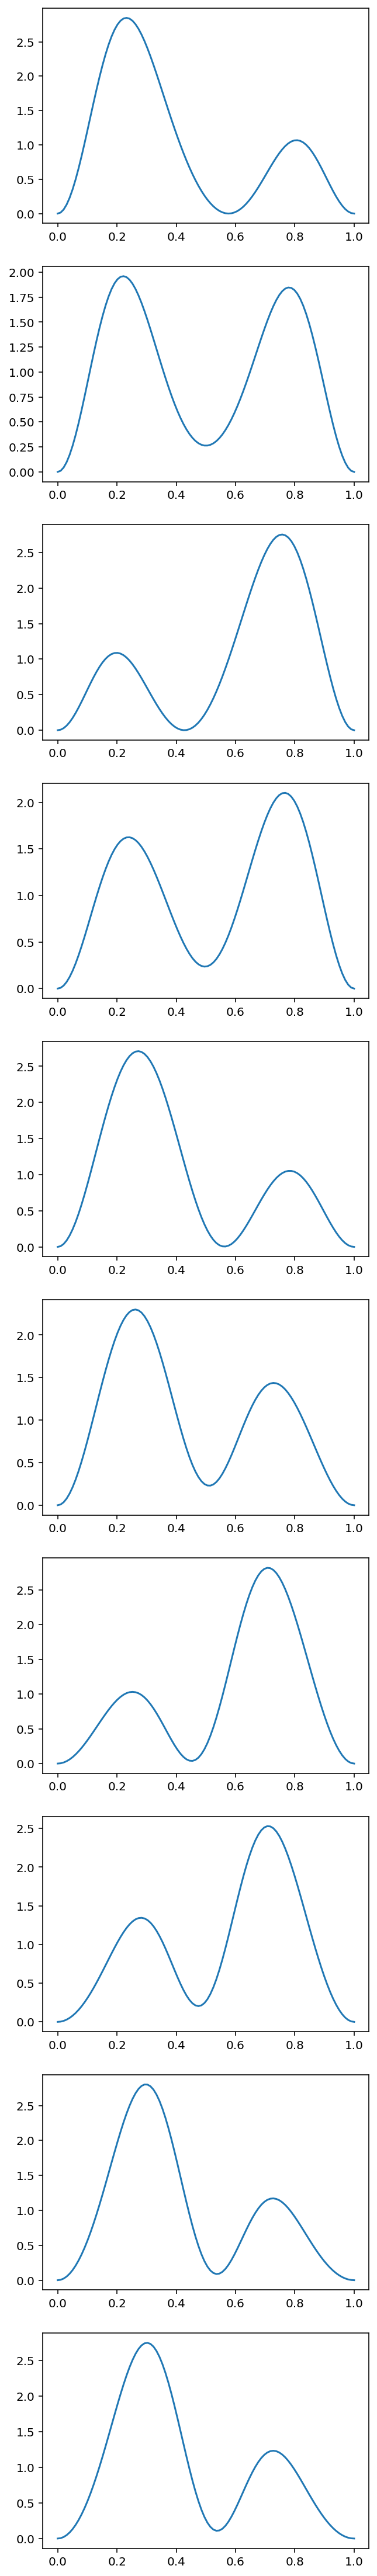

In [ ]:
def get_wave(t, precision=5):
    c = get_weights(precision)
    wave_t = np.zeros(x.shape, dtype='complex128') # wave at time t
    for n in range(len(c)):
        wave_t += c[n]*eigenfunc(n)*np.exp(-1j*eigenval(n)*t/hbar)
    return wave_t

def produce_time_evolve_plot(iterations=10, interval=0.1, precision=5): # interval in seconds
    fig, axes = plt.subplots(iterations, figsize=(5, 4*iterations))
    positions = [] # <x>
    momentums = [] # <p>
    time = []
    for i in range(iterations):
        t = i*interval
        time.append(t)
        wave_t = get_wave(t, precision)
        prob_t = get_prob(wave_t)
        positions.append(it.simps(prob_t*x, x))
        axes[i].plot(x, prob_t)
    
    print("Times:", time)
    print("Expectation values of position:", positions)

produce_time_evolve_plot()

19.739208802178716

In [ ]:
np.exp(-1j*eigenval(1)*1/hbar)

(0.22058404074969779+0.9753679720836315j)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=062842dd-94f5-4311-b2d7-8d25a1c6c4f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>